# Read a wavefront from Genesis as an SRW/WPG wavefront

In [20]:
from h5py import File
# The `genesis` module is from the lume-genesis package https://slaclab.github.io/lume-genesis/installation/
from genesis.writers import write_openpmd_wavefront_h5
from genesis.parsers import parse_genesis_dfl
# The `pmd_wavefront` module is in the subfolder
from pmd_wavefront.interfaces.srw import srw_wfr_from_openpmd_wavefront
# WPG package (https://github.com/samoylv/WPG)
from wpg import Wavefront
from wpg.srwlib import SRWLWfr, srwl
from wpg.wpg_uti_wf import plot_wf

## Read genesis and write into openPMD wavefront

In [2]:
# !wget -N https://portal.nersc.gov/cfs/m669/wavefronts/hxr_cut9_5keVTaper4_5.out.dfl

In [3]:
DFL = './hxr_cut9_5keVTaper4_5.out.dfl'
# Genesis parameters. These need to be known to populate the openPMD-wavefront metadata
PARAM={'ncar': 251, 'dgrid': 0.00015, 'xlamds': 1.5005e-10, 'zsep': 20, 'ntail':0, 'itdp':1}

In [4]:
D2 = parse_genesis_dfl(DFL, nx=PARAM['ncar'])

In [ ]:
with File('wavefront.h5', 'w') as h5:
    write_openpmd_wavefront_h5(h5, dfl=D2, param=PARAM)

## Read openPMD wavefront

In [10]:
with File('wavefront.h5', 'r') as h5:
    srw_wf = srw_wfr_from_openpmd_wavefront(h5['data']['000000']['meshes'],  iz_step=None, SRWLWfr_class=SRWLWfr)

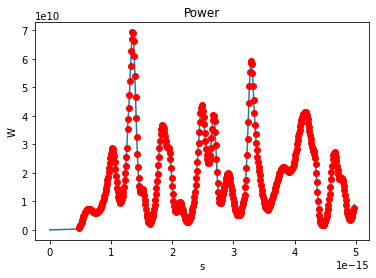

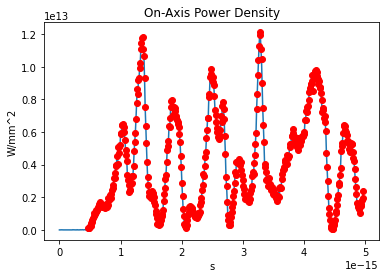

number of meaningful slices: 450
Pulse energy 8.5e-05 J
R-space
(251,) (251,)
FWHM in x = 5.976e-05 m.
FWHM in y = 6.215e-05 m.


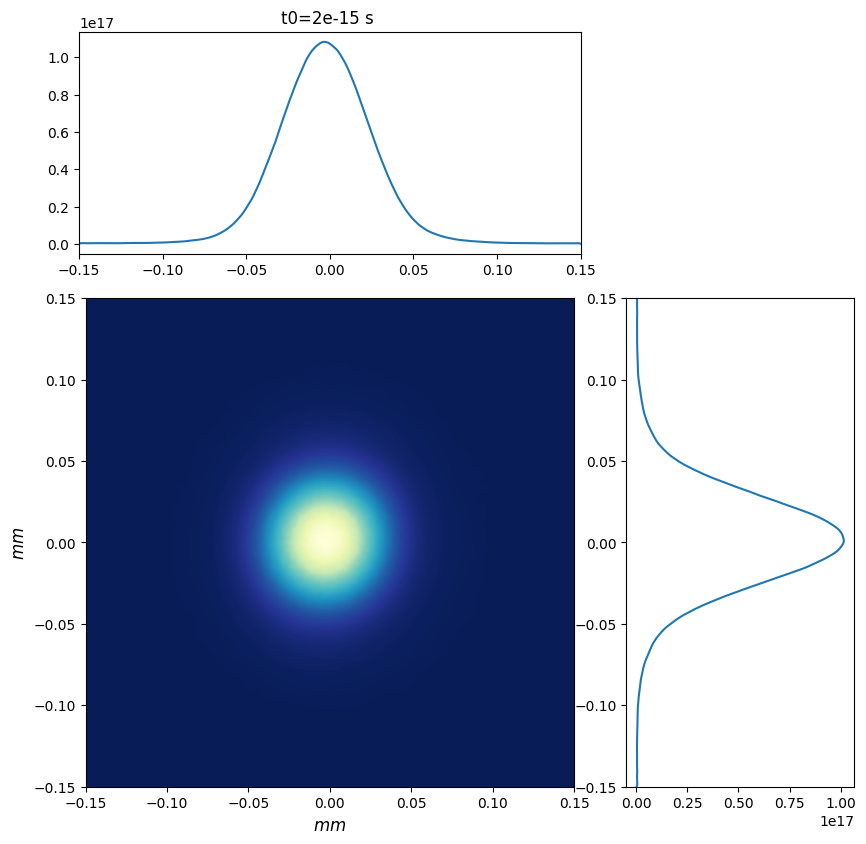

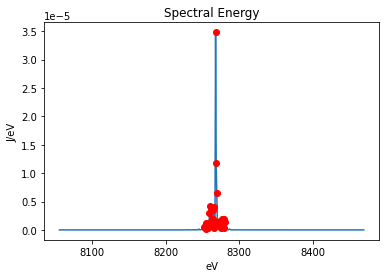

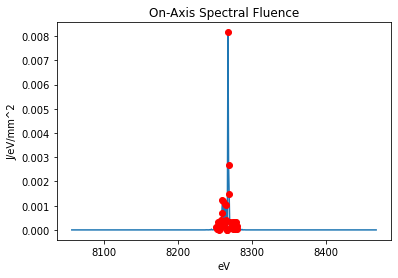

number of meaningful slices: 35
R-space
(251,) (251,)
FWHM in x = 5.976e-05 m.
FWHM in y = 6.215e-05 m.


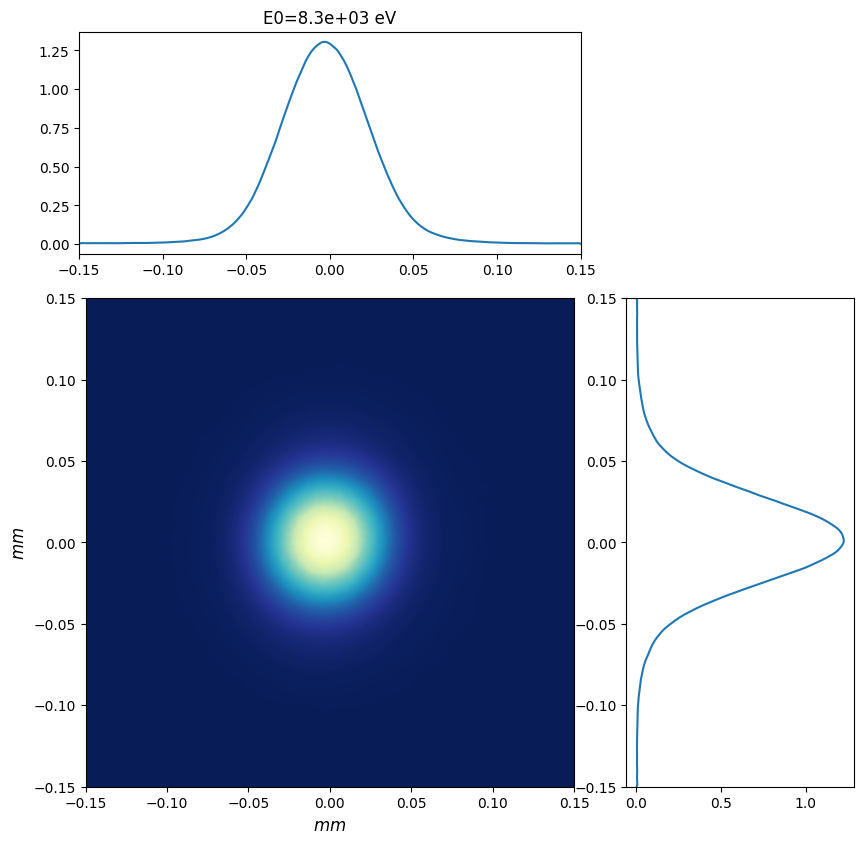

In [19]:
mwf = Wavefront(srw_wf)
plot_wf(mwf)
srwl.SetRepresElecField(mwf._srwl_wf, 'f')
plot_wf(mwf)